--2025-11-15 11:35:04--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-15 11:35:04--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-15 11:35:05--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

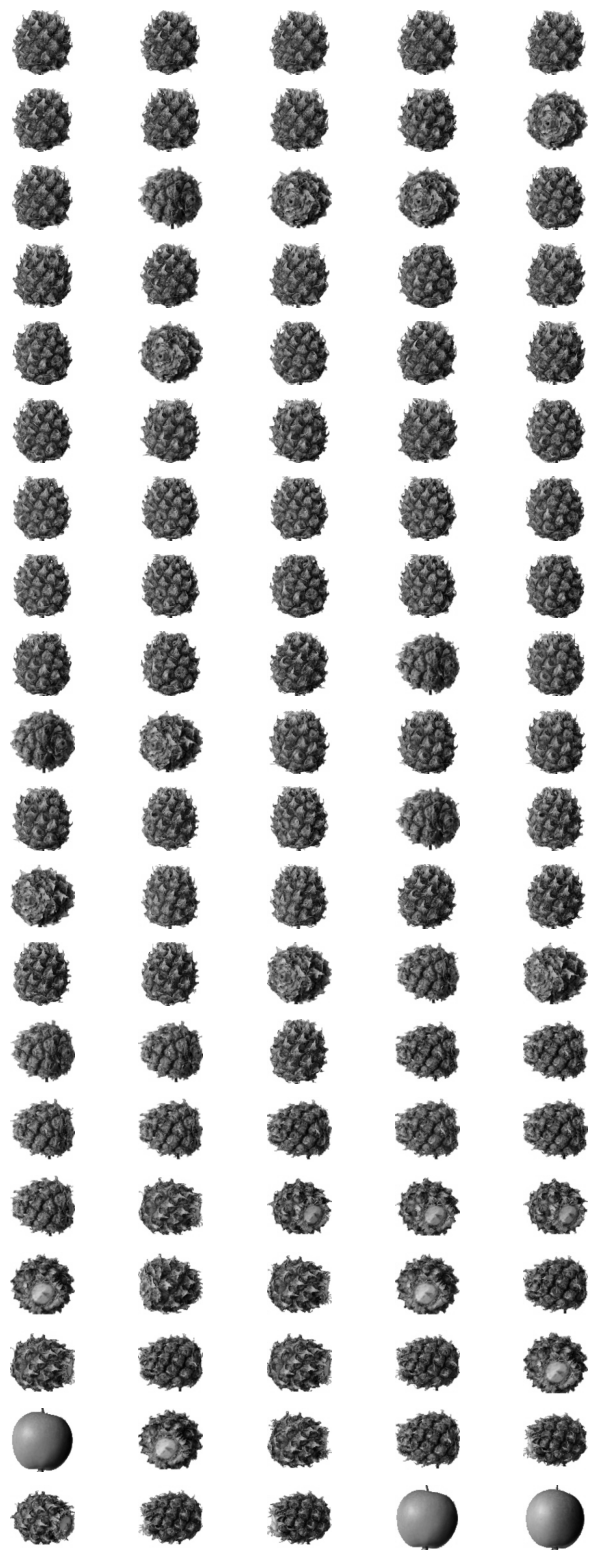

In [5]:
import numpy as np
import matplotlib.pyplot as plt

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

fruits = np.load('fruits_300.npy')
print(fruits.shape)

#과일별 데이터 분리
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape, pineapple.shape, banana.shape)

#파인애플 평균 이미지 계산
pineapple_mean = np.mean(pineapple, axis=0).reshape(-1,100)

#전체 300개 이미지와 파인애플 평균 이미지의 절대값 차이 계산
abs_diff = np.abs(fruits - pineapple_mean)

# 각 이미지별 오차 평균
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

#오차가 작은 순으로 100개 선택
pineapple_index = np.argsort(abs_mean)[:100]
print(pineapple_index.reshape(-1,10))

#20행 × 5열로 100개 이미지 시각화
fig, axs = plt.subplots(20, 5, figsize=(8, 20))
for i in range(20):
    for j in range(5):
        idx = pineapple_index[i*5 + j]
        axs[i, j].imshow(fruits[idx], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()